# acc calibration 
Oct 01, 2020 

a1
[-0.59545898 -0.13549805 -0.7915039 ]

RSS of a1
0.9994095481785277
r3
[-0.59563485 -0.13553807 -0.79173768]

内積: r3 * a1 =  0.9997047304972244

a2
[ 0.8660254  -0.13549805 -0.5       ]

a3
[-0.0391521  -0.97457658  0.19629302]

r2
[-0.03935206 -0.97955392  0.19729552]

r1
[ 0.8022908  -0.1486726  -0.57812276]

rotate
[[ 0.8022908  -0.1486726  -0.57812276]
 [-0.03935206 -0.97955392  0.19729552]
 [-0.59563485 -0.13553807 -0.79173768]]

検算を行う
6つの値がすべて１であればok(正規直交)
1.0
1.0
1.0
1.0
1.0
1.0

res：キャリブレーション結果
[-5.551115123125783e-17, 5.551115123125783e-17, 0.9997047304972244]

a_w : 世界座標系
[0 0 1]
r:a1 g:a2 b:a3


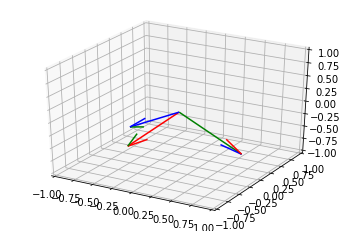

r:r1 g:r2 b:r3


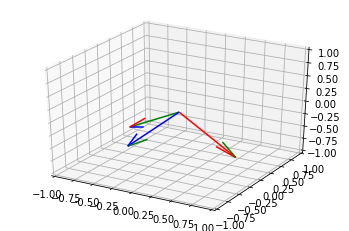

In [17]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# axis definetion 
# Front +x 
# Left +y 
# Top +z 


# STEP 1

# acc vector in world 
a_w = np.array([0,0,1])

# acc vector in sensor 
#a1 = np.array([0,0,-1]) 
# θ = π/3 傾いたときのセンサ値
#a1 = np.array([math.sin(math.pi/3),0,-math.cos(math.pi/3)]) 
# -0.595458982 -0.135498046 -0.791503903
#a1 = np.array([-0.632080076,-0.202392577,-0.738037106])
a1 = np.array([ -0.595458982 ,-0.135498046 ,-0.791503903])

print("a1") 
print(a1)
print()
print("RSS of a1")
print(a1[0]**2 + a1[1]**2 + a1[2]**2)

# 正規化関数
def normalize(v):
    L = v[0]**2 + v[1]**2 + v[2]**2 
    L = np.sqrt(L)
    return np.array(v/float(L)) 

def visu(x,y,z):
    fig = plt.figure() 
    ax = fig.gca(projection="3d") 
    ax.set_xlim3d(-1,1) 
    ax.set_ylim3d(-1,1) 
    ax.set_zlim3d(-1,1) 
    #a1 = np.array([1,1,0.3])
    #a2 = np.array([-0.3,1,1])
    #a3 = np.cross(a2,a1) 
    origin = [0,0,0] 
    d = np.array([x,y,z]) 
    U = d.T[0] 
    V = d.T[1] 
    #ax.quiver(0,0,0,1,1,1,length=0.5,normalize=True) 
    ax.quiver(origin,origin,origin,U,V,d.T[2],length=1,normalize=False,color=["r","g","b"]) 
    plt.show()

# z axis 
r3 = normalize(a1) 

print("r3") 
print(r3) 
print() 

# r3*a1 = 1 であればよい
print("内積: r3 * a1 = ",np.dot(r3,a1))
print()

# STEP 2

# acc in sensor 
# θ = π/4 傾いた時のセンサ値
#a2 = np.array([math.sin(math.pi/4),0, -math.cos(math.pi/4)])
a2 = np.array([math.sin(math.pi/3),a1[1],-math.cos(math.pi/3)])

print("a2")
print(a2)
print()


r3_2 = normalize(a2) 
# a1のz軸とa2のz軸の外積
#a3 = np.cross(a1,a2) 
a3 = np.cross(r3,r3_2)
print("a3") 
print(a3) 
print()

# a3を正規化し、y軸を求める。
r2 = normalize(a3) 

print("r2") 
print(r2) 
print()

# r2とr3の外積により、x軸を求める
r23 = np.cross(r2,r3) 
r1 = normalize(r23) 

print("r1") 
print(r1)
print()

# 回転行列 rotate = [r1 r2 r3].T 
rotate = np.array([r1,r2,r3])
print("rotate") 
print(rotate)


# 検算
print("\n検算を行う") 
print("6つの値がすべて１であればok(正規直交)")

# 行ベクトルについて
for i in range(3):
    val = rotate[i][0]**2 + rotate[i][1]**2 + rotate[i][2]**2 
    val = np.sqrt(val) 
    print(val) 

# 列ベクトル
for i in range(3):
    val = rotate[0][i]**2 + rotate[1][i]**2 + rotate[2][i]**2 
    val = np.sqrt(val) 
    print(val)



# resがa_wと一致すればok
res = []
for i in range(3):
    val = np.dot(rotate[i],a1) 
    res.append(val)
print("\nres：キャリブレーション結果") 
print(res)
print("\na_w : 世界座標系")
print(a_w)

# 可視化
print("r:a1 g:a2 b:a3")
visu(a1,a2,a3) 
print("r:r1 g:r2 b:r3")
visu(r1,r2,r3) 